# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/data.csv',index_col=0)

In [26]:
df.head(10)

,x1,x2,y
0,-4.626272,-6.658988,0
1,-7.789640,0.262519,0
2,-8.739678,1.537758,0
3,-2.546441,-7.705224,0
4,-2.751506,-7.940187,0
5,0.303440,5.969639,0
6,-5.920224,1.339210,1
7,-7.555594,0.733846,1
8,5.995393,-4.607815,0
9,1.465613,4.338939,1


In [25]:
df['y'].value_counts() #Распределение классов. Можно считать что классы сбалансированы

1    5097
0    4903
Name: y, dtype: int64

In [27]:
df.describe()

,x1,x2,y
count,10000.000000,10000.000000,10000.000000
mean,-0.029488,-0.098799,0.509700
std,4.981907,5.022414,0.499931
min,-9.988732,-9.972095,0.000000
25%,-4.062951,-4.170403,0.000000
50%,-0.063085,-0.097836,1.000000
75%,4.016095,3.880448,1.000000
max,9.985560,9.982304,1.000000


Нормализацию можно не делать, численные значения фичей в примерно одинакововом диапазоне

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<AxesSubplot:xlabel='x1', ylabel='x2'>

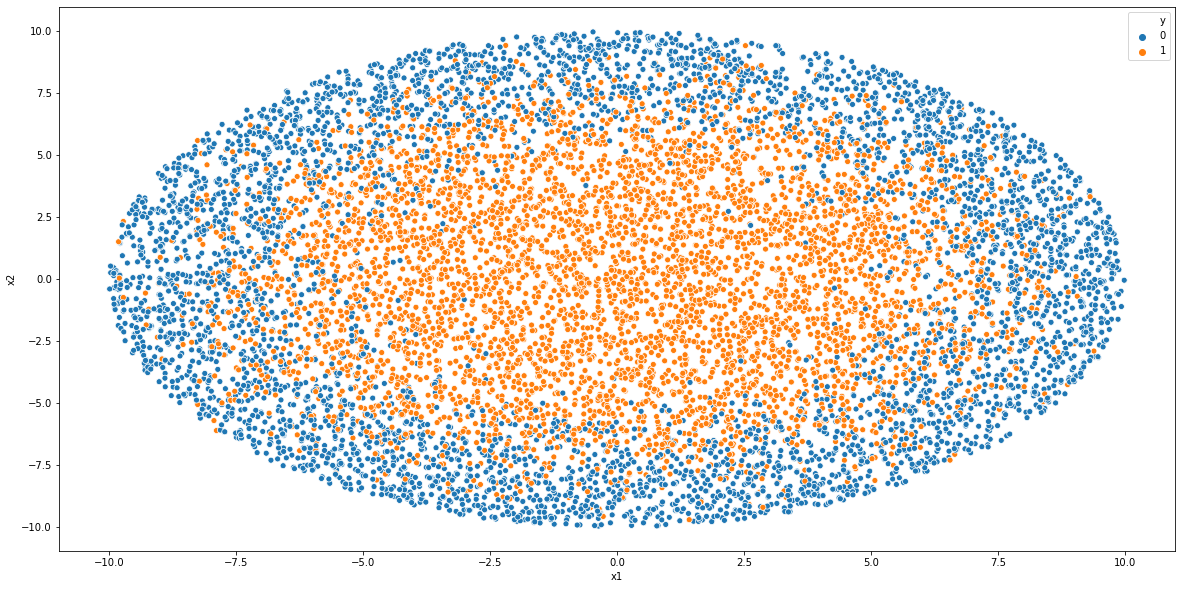

In [4]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

[-0.73632049 -0.73645764 -0.70483312 ... -0.69660189 -0.69246363
 -0.69303521]
Точность нашей модели 0.5027272727272727


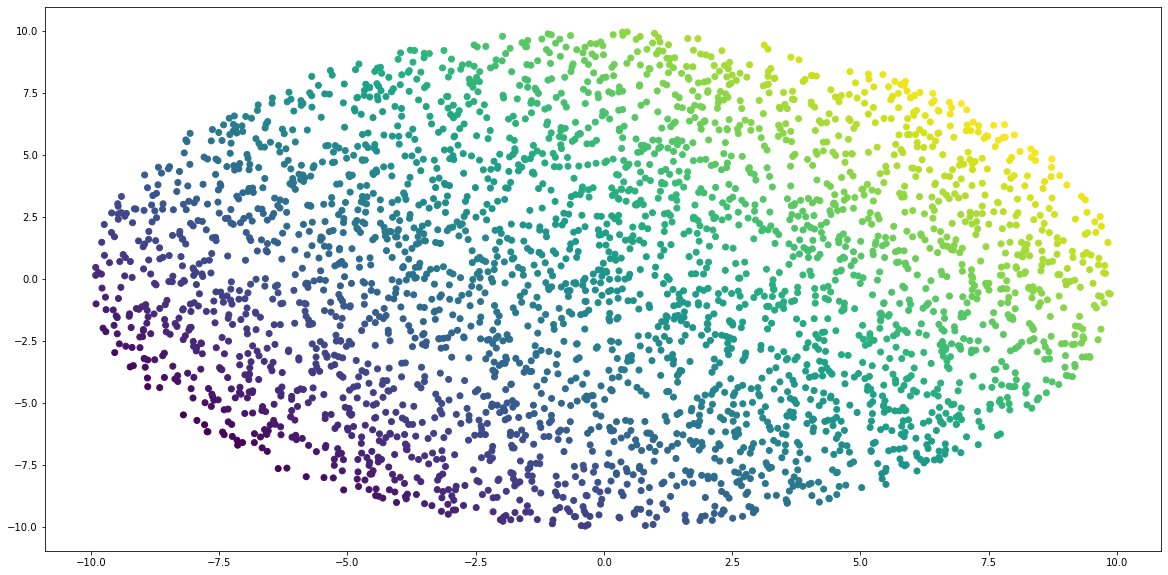

In [16]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
logit = LogisticRegression(random_state=5, class_weight= 'balanced',n_jobs=-1,C=0.01)
logit.fit(X_train,y_train)

predict_logit = logit.predict(X_test) 
predict_log_proba = logit.predict_log_proba(X_test)[:,1]
print(predict_log_proba)
#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Ответ: Логистическая регрессия это ЛИНЕЙНЫЙ классификатор, чтобы была нелинейность, можно
добавить нелинейные фичи(например x1^2 или x2^2)

Точность нашей модели 0.8475757575757575


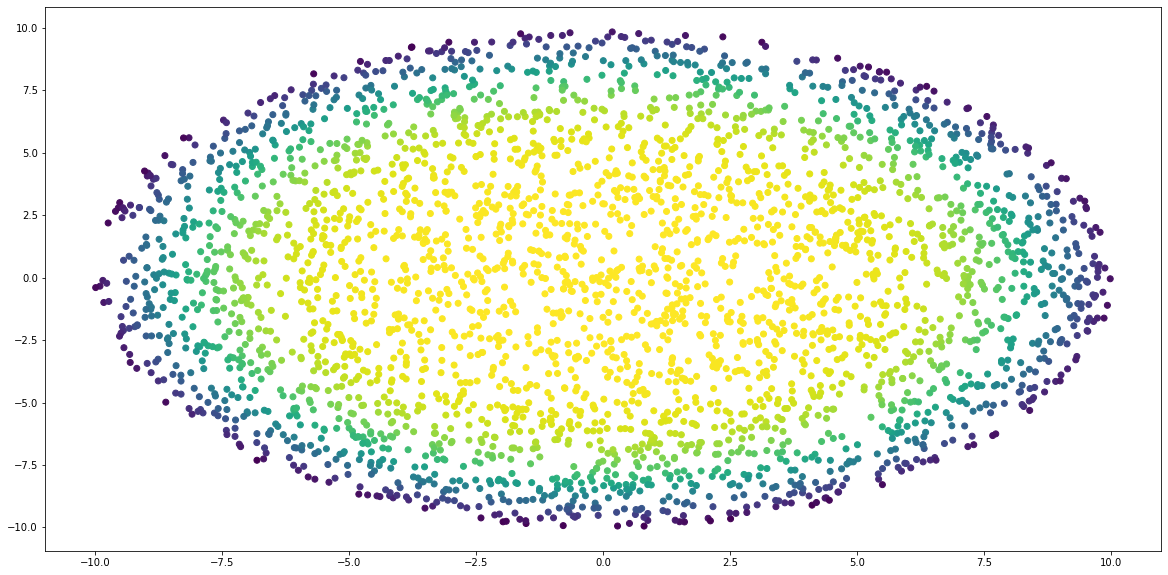

In [23]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = df_new['x1']**2
df_new['new_feature_2'] = df_new['x2']**2


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1','new_feature_2']],
                                                                    df_new['y'], test_size = 0.33)

logit_new = LogisticRegression(random_state=5, class_weight= 'balanced',n_jobs=-1,C=0.001)
logit_new.fit(X_train_new,y_train_new)

predict_logit = logit_new.predict(X_test_new) 
predict_log_proba = logit_new.predict_log_proba(X_test_new)[:,1]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Ответ: Ограничить глубину дерева, так как дерево имеет свойство переобучаться

Лучшие параметры дерева: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 4}
Точность нашей модели 0.8251515151515152


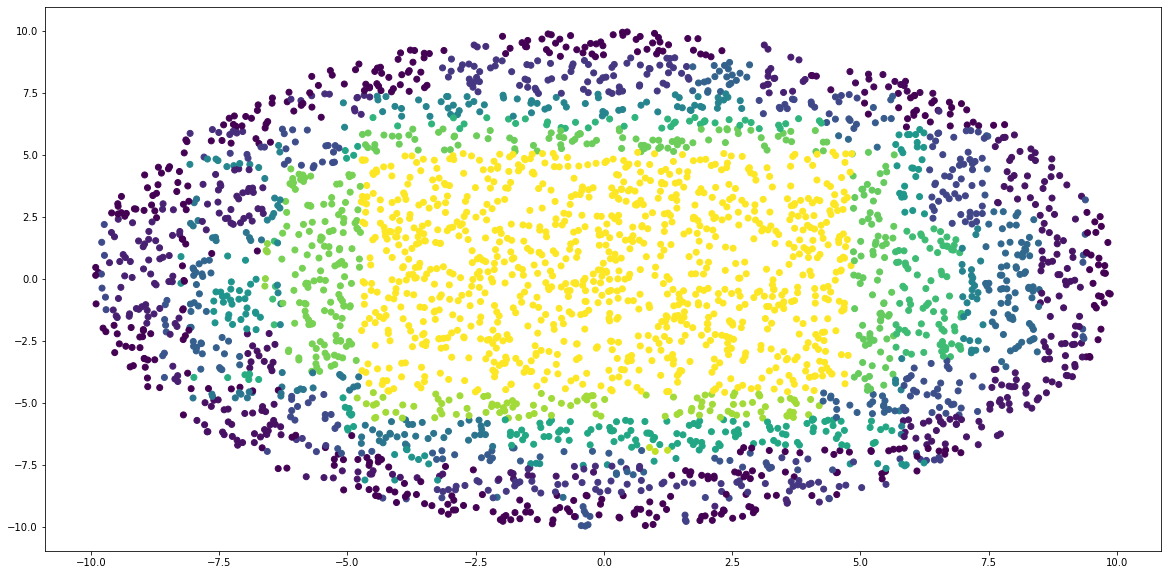

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#########################################
# Инициализация Дерева
dt = DecisionTreeClassifier()

# Словарь параметров для Дерева и их диапазоном значений
dt_params = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)}

# Обучение Дерева с перебором значений параметров
search = GridSearchCV(dt, param_grid=dt_params, cv=5)
search.fit(X_train, y_train)

# Дерево с лучшим сочетаением параметров
best_tree = search.best_estimator_

# Получаем лучшие параметры от лучшей обученной модели.
print('Лучшие параметры дерева:', search.best_params_)

predict_tree = best_tree.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = best_tree.predict_proba(X_test)[:,1]

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Ответ: Ансамблирование может помочь, если модели обучались независимо друг от друга 

Лучшие параметры Леса: {'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 40}
Точность нашей модели 0.8312121212121212


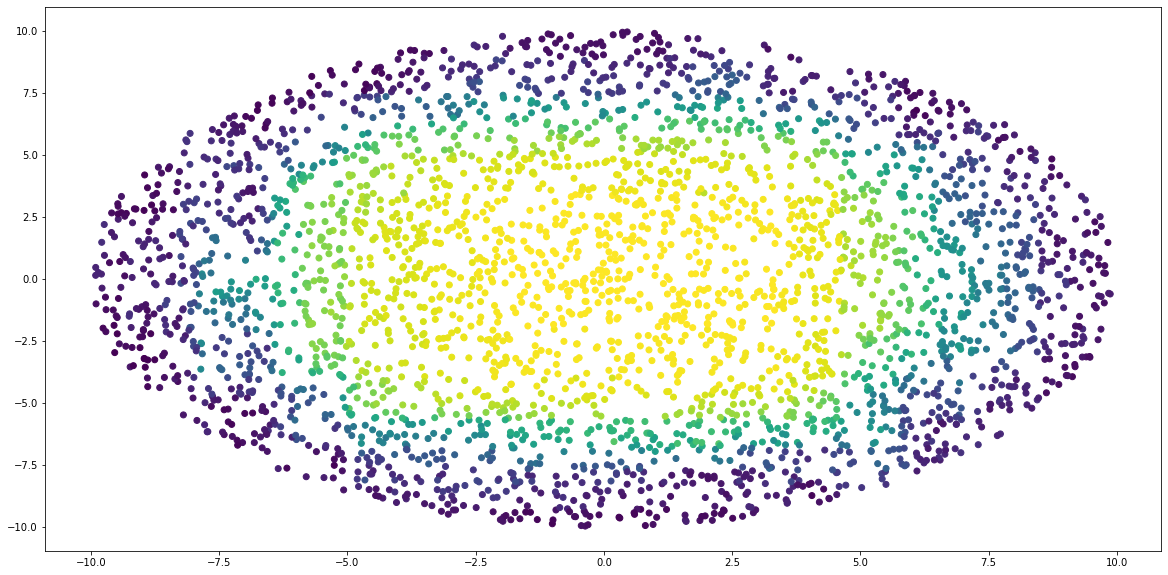

In [37]:
from sklearn.ensemble import RandomForestClassifier

#########################################

# Объявляем классификатор и параметры для перебора
clf_RF = RandomForestClassifier(random_state=42)
parametrs = {'n_estimators':      range(10, 100, 10),
             'max_depth':         range(1, 30, 2),
             'min_samples_leaf':  range(1, 7),
             'min_samples_split': range(2, 9, 2)}

# Запускаем обучение
clf_grid = GridSearchCV(clf_RF, param_grid=parametrs, cv=3, n_jobs=-1)
clf_grid.fit(X_train, y_train)

# Получаем лучшие параметры от лучшей обученной модели.
print('Лучшие параметры Леса:', clf_grid.best_params_)

predict_forest = clf_grid.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = clf_grid.predict_proba(X_test)[:,1]

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадки и копипастим все нужное сюда!

In [38]:
# Подгружаем tensorflow 
import tensorflow as tf
import tensorflow.keras as keras


print(tf.__version__)


2.3.1


In [39]:
#########################################
from tensorflow.keras import layers as L         # Уже готовые слои для моделей
from tensorflow.keras.models import Sequential   # Специальный класс для склеивания слоёв
from tensorflow.keras.models import Model        # Альтернативный класс для склейки слоёв
import tensorflow.keras.optimizers as opt        # Разные оптимизационные алгоритмы :3 

def get_new_model( ):
    
    model = Sequential()
    
    # Добавляем в нашу модель первый слой из 5 нейронов
    model.add(L.Dense(5, input_dim = X_train.shape[1], kernel_initializer='random_normal'))
     # Добавляем функцию активации на первый слой 
    model.add(L.Activation('sigmoid'))
    
    # Добавляем ещё один слой из 5 нейронов
    model.add(L.Dense(5, kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))

    # На выходе мы должны получить вероятности того, что объект относится к разным классам 
    # Сделать такое преобразование позволяет softmax как функция активации
    # На выход будет идти 2 вероятности по числу классов
    model.add(L.Dense(2, activation='softmax', kernel_initializer = 'random_normal'))
    
    # В качестве оптимизации будем использовать Adam
    optimizer = opt.Adam(lr=1e-3)

    # Собираем модель
    model.compile(loss = 'categorical_crossentropy', 
                  metrics=["accuracy"], 
                  optimizer=optimizer)
    
    return model


In [87]:
model = get_new_model()

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_6 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
activation_7 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 12        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [89]:
from tensorflow.keras.utils import to_categorical
hist = model.fit(X_train, to_categorical(y_train), validation_split=0.2, epochs=100, verbose=0)

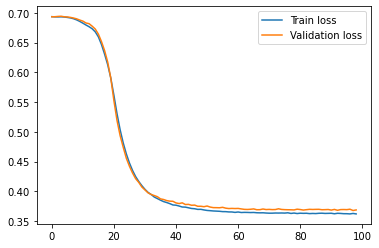

In [90]:
start = 1
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

Точность нашей модели 0.833939393939394


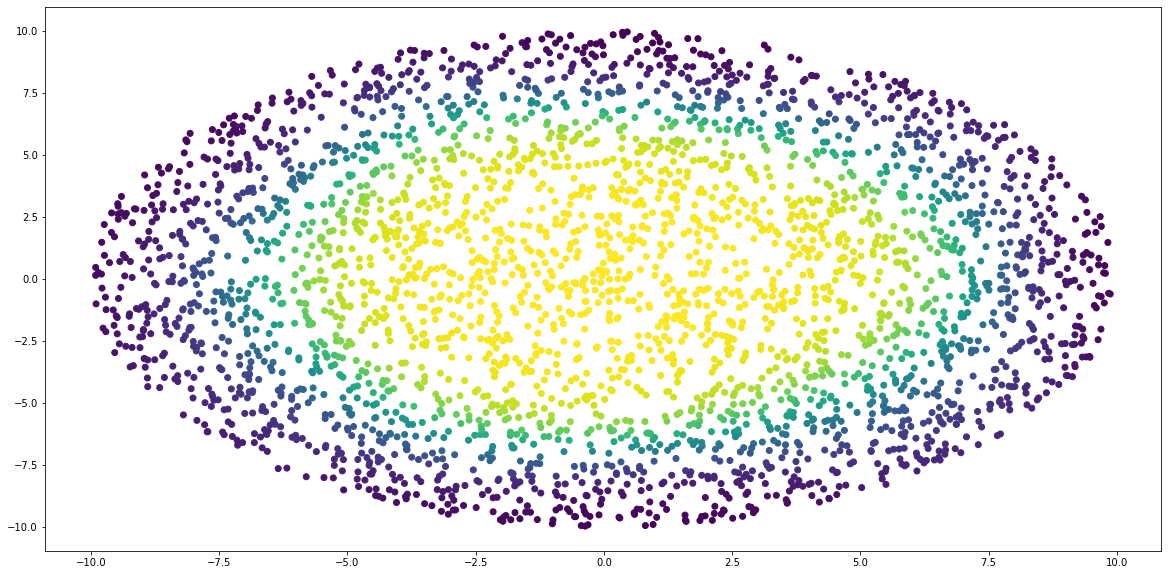

In [91]:
predict_neural = model.predict_proba(X_test)[:,1]
predict_classes = model.predict_classes(X_test)
print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)